In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error


%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.linear_model import Ridge
import csv
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
import patsy
import statsmodels.formula.api as smf

In [78]:
csvfile5 = pd.read_csv('df7_nbateams_2015-13_train_WinPCT.csv')
csvfile6 = pd.read_csv('df7_nbateams_2016_testOne-Use.csv')
csvfile7 = pd.read_csv('df7_nbateams_2017_test-Use.csv')

In [79]:
df10 = csvfile5 #Train Dataset
df11 = csvfile6 #Test Dataset
df12 = csvfile7 #Verify Dataset

In [60]:
df10.columns

Index(['YEAR_x', 'TEAM', 'WINPERCENT_x', 'PREV_YEAR_x', 'GP_y', 'WINPERCENT_y',
       'WinPCT_2013_14', 'MIN_y', 'PTS_y', 'FGM_y', 'FGA_y', 'FGPercent_y',
       'ThreePtMade_y', 'ThreePtAttempts_y', 'ThreePtPercent_y', 'FTM_y',
       'FTA_y', 'FTPercent_y', 'OREB_y', 'DREB_y', 'REB_y', 'AST_y', 'TOV_y',
       'STL_y', 'BLK_y', 'BLKA_y', 'PF_y', 'PFD_y', 'PlusMinus_y'],
      dtype='object')

In [61]:
#X_skTrain = df10.iloc[:, 4:]
#y_skTrain = df10.iloc[:, 2]


y_train,X_train = patsy.dmatrices('WINPERCENT_x ~ GP_y + WINPERCENT_y + WinPCT_2013_14 + MIN_y + PTS_y + FGM_y + FGA_y + FGPercent_y + ThreePtMade_y + ThreePtAttempts_y + ThreePtPercent_y + FTM_y + FTA_y + FTPercent_y + OREB_y + DREB_y + REB_y + AST_y + TOV_y + STL_y + BLK_y + BLKA_y + PF_y + PFD_y + PlusMinus_y', data=df10, return_type="dataframe" )
modelTrain = sm.OLS(y_train,X_train)
fitTrain = modelTrain.fit()
fitTrain.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           WINPERCENT_x   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     6.508
Date:                Fri, 26 Jan 2018   Prob (F-statistic):             0.0231
Time:                        10:14:43   Log-Likelihood:                 63.317
No. Observations:                  30   AIC:                            -76.63
Df Residuals:                       5   BIC:                            -41.60
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0100      0.004      2.265      0.073      -0.001       0.021
GP_y                  0.8217      0.363      2.265      0.073      -0.111       1.754
WINPERCENT_y         -1.6168      0.559     -2.892      0.034      -3.054      -0.180
WinPCT_2013_14        0.1163      0.141      0.825      0.447      -0.246       0.479
MIN_y                 0.0802      0.150      0.534      0.616      -0.306       0.466
PTS_y                 0.5115      0.474      1.080      0.330      -0.706       1.729
FGM_y                 0.4466      1.189      0.375      0.723      -2.611       3.504
FGA_y                -0.7543      0.392     -1.923      0.112      -1.762       0.254
FGPercent_y          -1.1934      0.660     -1.809      0.130      -2.889       0.502
ThreePtMade_y         0.2539      0.576      0.441      0.678      -1.227       1.735
ThreePtAttempts_y    -0.2403      0.151     -1.592      0.172      -0.628       0.148
ThreePtPercent_y     -0.2395      0.100     -2.387      0.063      -0.497       0.018
FTM_y                -0.1368      0.422     -0.324      0.759      -1.221       0.947
FTA_y                -0.3296      0.436     -0.756      0.484      -1.450       0.791
FTPercent_y          -0.0578      0.132     -0.438      0.679      -0.397       0.281
OREB_y                1.5400      0.583      2.641      0.046       0.041       3.039
DREB_y                1.5276      0.590      2.588      0.049       0.010       3.045
REB_y                -1.4480      0.575     -2.520      0.053      -2.925       0.029
AST_y                 0.0266      0.020      1.317      0.245      -0.025       0.079
TOV_y                -0.0880      0.080     -1.106      0.319      -0.293       0.117
STL_y                 0.0993      0.099      0.998      0.364      -0.156       0.355
BLK_y                -0.0289      0.049     -0.592      0.580      -0.154       0.097
BLKA_y                0.0634      0.039      1.607      0.169      -0.038       0.165
PF_y                  0.0148      0.020      0.740      0.493      -0.037       0.066
PFD_y                 0.0268      0.042      0.635      0.553      -0.082       0.135
PlusMinus_y           0.0567      0.034      1.655      0.159      -0.031       0.145
==============================================================================
Omnibus:                        3.331   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.144
Skew:                          -0.211   Prob(JB):                        0.342
Kurtosis:                       4.240   Cond. No.                     4.26e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smal

In [80]:
y_test,X_test = patsy.dmatrices('WINPERCENT_x ~ GP_y + WINPERCENT_y + WinPCT_2014_15 + MIN_y + PTS_y + FGM_y + FGA_y + FGPercent_y + ThreePtMade_y + ThreePtAttempts_y + ThreePtPercent_y + FTM_y + FTA_y + FTPercent_y + OREB_y + DREB_y + REB_y + AST_y + TOV_y + STL_y + BLK_y + BLKA_y + PF_y + PFD_y + PlusMinus_y', data=df11, return_type="dataframe" )
#predTest = fitTrain.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [7]:
predTrain = fitTrain.predict(X_train)

fitTrain.rsquared

0.93341275810283264

In [89]:
predTest = fitTrain.predict(X_test)
predTest

y_predTest = predTest
y_Testreal =y_test

metrics.r2_score(y_Testreal, y_predTest)

-2.2396121979966486

In [62]:
#Training Dataset
X_skTrain = df10.iloc[:, 4:]
y_skTrain = df10.iloc[:, 2]

#Test Dataset
X_skTest = df11.iloc[:, 4:]
y_skTest = df11.iloc[:, 2]

#Validate Dataset
X_skVal = df12.iloc[:, 4:]
y_skVal = df12.iloc[:, 2]

In [17]:
##### Linear Regression using sklearn################
lrModel = LinearRegression()

In [18]:
lrModel.fit(X_skTrain,y_skTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lrModel.score(X_skTrain,y_skTrain)

0.96898275294917502

In [90]:
lrModel.score(X_skTest,y_skTest)

-2.2396121980082619

In [91]:
lrModel.score(X_skVal,y_skVal)

-2.2746852270332112

In [20]:
##### Linear Regression using Ridge() sklearn################
ModelRidge1 = Ridge()

In [21]:
ModelRidge1.fit(X_skTrain, y_skTrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
#R-square value for Train Dataset
ModelRidge1.score(X_skTrain, y_skTrain)

0.72767928817295491

In [44]:
#R-square value for Test Dataset
ModelRidge1.score(X_skTest, y_skTest)

0.39751589655116648

In [63]:
ModelRidge1.score(X_skVal, y_skVal)

0.37892128015534576

In [64]:
##### Linear Regression using RidgeCV() with CV=5 sklearn################
#ModelRidgeCV = RidgeCV(cv=5, normalize=False)
ModelRidgeCV = RidgeCV()

In [65]:
ModelRidgeCV.fit(X_skTrain, y_skTrain)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [66]:
ModelRidgeCV.score(X_skTrain, y_skTrain)

0.66912356893290792

In [67]:
ModelRidgeCV.score(X_skTest, y_skTest)

0.53320231332210166

In [68]:
ModelRidgeCV.score(X_skVal, y_skVal)

0.40007397229126185

In [99]:
ModelLasso = Lasso()
ModelLasso.fit(X_skTrain, y_skTrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
ModelLasso.score(X_skTrain, y_skTrain)

0.0

In [101]:
ModelLasso.score(X_skTest, y_skTest)

-2.4694789368950865e-07

In [102]:
ModelLasso.score(X_skVal, y_skVal)

-5.7281773591100205e-07

In [71]:
##### Linear Regression using LassoCV() with CV=5 sklearn################
#ModelLassoCV = LassoCV(cv=5, normalize=False)
ModelLassoCV = LassoCV()

In [72]:
ModelLassoCV.fit(X_skTrain, y_skTrain)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [73]:
ModelLassoCV.score(X_skTrain, y_skTrain)

0.60918729408816452

In [74]:
ModelLassoCV.score(X_skTest, y_skTest)

0.65888062209622222

In [75]:
ModelLassoCV.score(X_skVal, y_skVal)

0.51759006079491598

In [76]:
df10.head()

,YEAR_x,TEAM,WINPERCENT_x,PREV_YEAR_x,GP_y,WINPERCENT_y,WinPCT_2013_14,MIN_y,PTS_y,FGM_y,...,DREB_y,REB_y,AST_y,TOV_y,STL_y,BLK_y,BLKA_y,PF_y,PFD_y,PlusMinus_y
0,2015-16,Golden State Warriors,0.890,2014-15,82,0.817,0.622,48.1,110.0,41.6,...,34.3,44.7,27.4,14.5,9.3,6.0,3.6,19.9,18.8,10.1
1,2015-16,San Antonio Spurs,0.817,2014-15,82,0.671,0.756,48.7,103.2,39.1,...,33.8,43.6,24.4,14.0,8.0,5.4,4.4,19.1,19.7,6.2
2,2015-16,Cleveland Cavaliers,0.695,2014-15,82,0.646,0.402,48.2,103.1,37.7,...,31.9,43.0,22.1,14.3,7.4,4.1,4.5,18.4,20.5,4.5
3,2015-16,Toronto Raptors,0.683,2014-15,82,0.598,0.585,48.4,104.0,37.9,...,30.8,41.5,20.7,12.9,7.5,4.4,5.0,20.9,20.3,3.1
4,2015-16,Oklahoma City Thunder,0.671,2014-15,82,0.549,0.720,48.4,104.0,38.8,...,34.7,47.5,20.5,14.7,7.3,5.5,4.6,22.3,20.4,2.2


In [119]:
ModelRidge1.coef_

array([ 0.        , -0.03650114, -0.00301891, -0.07859429,  0.02593506,
       -0.03001456, -0.01274101, -0.04557523,  0.05338656, -0.03170766,
       -0.03921506,  0.01428403, -0.02119499, -0.00303754,  0.00787165,
        0.01246303, -0.03071435,  0.02310608,  0.00438578, -0.04620299,
       -0.00672799, -0.01388177,  0.01851003, -0.02217387,  0.03967034])

In [108]:
yPred_skTrain = ModelRidge1.predict(X_skTrain)
yPred_skTrain

array([ 0.77655424,  0.66115305,  0.60939039,  0.64576538,  0.55454835,
        0.48114804,  0.58904278,  0.48040581,  0.49542245,  0.660109  ,
        0.55395308,  0.42402815,  0.61981661,  0.50966298,  0.5967785 ,
        0.60026388,  0.53572035,  0.52279649,  0.48039675,  0.31576595,
        0.46186745,  0.40639811,  0.37018562,  0.3253917 ,  0.29218768,
        0.39100348,  0.42896558,  0.30878418,  0.17923792,  0.72025603])

Text(0,0.5,'Residue_Train')

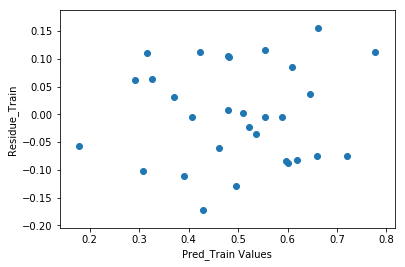

In [113]:
residueTrain = y_skTrain - yPred_skTrain

#plt.scatter(yPred_skTrain, residueTrain, c=residueTrain, cmap="plasma")

plt.scatter(yPred_skTrain, residueTrain)

#plt.plot(yPred_skTrain, residueTrain)

#plt.barh(yPred_skTrain, residueTrain)

#plt.plot(x, x, 'r--');

plt.xlabel('Pred_Train Values')
plt.ylabel('Residue_Train')

In [114]:
yPred_skTest = ModelRidge1.predict(X_skTest)
yPred_skTest

array([ 0.76032243,  0.78678967,  0.35298014,  0.64194299,  0.47432509,
        0.54402987,  0.67953993,  0.55684384,  0.4958499 ,  0.68308685,
        0.47694255,  0.63777803,  0.45916249,  0.36606562,  0.42344235,
        0.48582771,  0.54102028,  0.41473246,  0.35538154,  0.55487377,
        0.38334411,  0.49025095,  0.29988149,  0.47397727,  0.52025238,
        0.44155237,  0.16807459,  0.28748329,  0.25599829,  0.24204834])

Text(0,0.5,'Residue_Test')

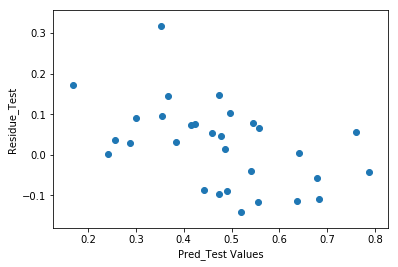

In [115]:
residueTest = y_skTest - yPred_skTest

#plt.scatter(yPred_skTrain, residueTrain, c=residueTrain, cmap="plasma")

plt.scatter(yPred_skTest, residueTest)

plt.xlabel('Pred_Test Values')
plt.ylabel('Residue_Test')

In [116]:
yPred_skVal = ModelRidge1.predict(X_skVal)
yPred_skVal

array([ 0.86210455,  0.68546156,  0.69179369,  0.53810981,  0.65012672,
        0.49317017,  0.49484278,  0.48234518,  0.45676726,  0.49718475,
        0.36990439,  0.52236657,  0.41304046,  0.42586624,  0.51447811,
        0.34581427,  0.48063562,  0.56997992,  0.42425617,  0.3609975 ,
        0.55658613,  0.22886543,  0.51489342,  0.3082912 ,  0.55038256,
        0.27747901,  0.46541079,  0.38033354,  0.31463613,  0.34280489])

Text(0,0.5,'Residue_Validate_2017-2018')

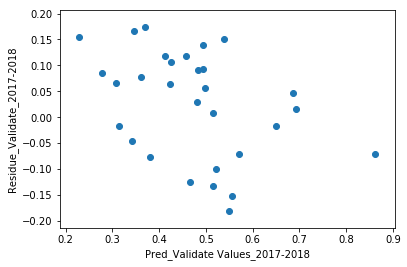

In [118]:
residueVal = y_skVal - yPred_skVal

#plt.scatter(yPred_skTrain, residueTrain, c=residueTrain, cmap="plasma")

plt.scatter(yPred_skVal, residueVal)

plt.xlabel('Pred_Validate Values_2017-2018')
plt.ylabel('Residue_Validate_2017-2018')